In [2]:
import pandas as pd
import numpy as np

Preprocessing of movie_metadata file

In [1]:
data = pd.read_csv("movie_metadata.csv")

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\dheer\AppData\Local\Temp\ipykernel_12016\2938383944.py:1: SyntaxWarning: invalid escape sequence '\m'
  data = pd.read_csv("datasets\movie_metadata.csv")
C:\Users\dheer\AppData\Local\Temp\ipykernel_12016\2938383944.py:1: SyntaxWarning: invalid escape sequence '\m'
  data = pd.read_csv("datasets\movie_metadata.csv")


NameError: name 'pd' is not defined

In [4]:
data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
data.shape

(5043, 28)

In [6]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [7]:

#  We dont require all of the features for movie recommendation. So we select only ['director_name','genres',
#  'actor_1_name','actor_2_name','actor_3_name', 'movie_title'] 

In [8]:
data = data[['director_name', 'genres', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'movie_title']]

In [9]:
data.head(5)

,director_name,genres,actor_1_name,actor_2_name,actor_3_name,movie_title
0,James Cameron,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Joel David Moore,Wes Studi,Avatar
1,Gore Verbinski,Action|Adventure|Fantasy,Johnny Depp,Orlando Bloom,Jack Davenport,Pirates of the Caribbean: At World's End
2,Sam Mendes,Action|Adventure|Thriller,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Spectre
3,Christopher Nolan,Action|Thriller,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,The Dark Knight Rises
4,Doug Walker,Documentary,Doug Walker,Rob Walker,NaN,Star Wars: Episode VII - The Force Awakens ...


In [10]:
data.isnull().values.any()

np.True_

In [11]:
#We can see that there are null values in dataframe.

In [12]:
for column in data.columns:
    data[column] = data[column].replace(np.nan, 'unknown')

In [13]:
data.isnull().values.any()

np.False_

In [14]:
data['genres']=data['genres'].str.replace('|', ' ') #to split the genres easily, because genres have multiple values which are useful in recommending

In [15]:
data.head(5)

,director_name,genres,actor_1_name,actor_2_name,actor_3_name,movie_title
0,James Cameron,Action Adventure Fantasy Sci-Fi,CCH Pounder,Joel David Moore,Wes Studi,Avatar
1,Gore Verbinski,Action Adventure Fantasy,Johnny Depp,Orlando Bloom,Jack Davenport,Pirates of the Caribbean: At World's End
2,Sam Mendes,Action Adventure Thriller,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Spectre
3,Christopher Nolan,Action Thriller,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,The Dark Knight Rises
4,Doug Walker,Documentary,Doug Walker,Rob Walker,unknown,Star Wars: Episode VII - The Force Awakens ...


In [16]:
data['director_name'][0]

'James Cameron'

In [17]:
data['genres'][0]

'Action Adventure Fantasy Sci-Fi'

In [18]:
data['actor_1_name'][0]

'CCH Pounder'

In [19]:
data['actor_2_name'][0]

'Joel David Moore'

In [20]:
data['actor_3_name'][0]

'Wes Studi'

In [21]:
data['movie_title'][0]

'Avatar\xa0'

In [22]:
# since it is a web scrapped data, here we can see \xa0 in title which signifies the non breaking space, so we have to remove this 

In [23]:
data['movie_title']=data['movie_title'].str.replace('\xa0', '')

In [24]:
data['movie_title'][0]

'Avatar'

In [25]:
data.to_csv('data.csv', index = False)

Preprocessing of credits file

In [26]:
credits = pd.read_csv('credits.csv')

In [27]:
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [28]:
meta = pd.read_csv('datasets/movies_metadata.csv')

C:\Users\dheer\AppData\Local\Temp\ipykernel_24992\646531160.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv('datasets/movies_metadata.csv')


In [29]:
meta.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [30]:
meta.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [31]:
meta = meta[['genres', 'title', 'id']]

In [32]:
meta

,genres,title,id
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,862
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,8844
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,15602
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale,31357
4,"[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,11862
...,...,...,...
45461,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",Subdue,439050
45462,"[{'id': 18, 'name': 'Drama'}]",Century of Birthing,111109
45463,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",Betrayal,67758
45464,[],Satan Triumphant,227506


In [33]:
meta.id.dtype

dtype('O')

In [34]:
credits.id.dtype

dtype('int64')

In [35]:
meta = meta[meta['id'].str.isnumeric()] #The id column in meta dataset contains date. considering only numeric

In [36]:
meta['id'] = meta['id'].astype(int)

C:\Users\dheer\AppData\Local\Temp\ipykernel_24992\3263122631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta['id'] = meta['id'].astype(int)


In [37]:
mergedata = pd.merge(meta, credits, on='id')

In [38]:
mergedata

,genres,title,id,cast,crew
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,862,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,8844,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,15602,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale,31357,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,"[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,11862,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."
...,...,...,...,...,...
45533,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",Subdue,439050,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de..."
45534,"[{'id': 18, 'name': 'Drama'}]",Century of Birthing,111109,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de..."
45535,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",Betrayal,67758,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de..."
45536,[],Satan Triumphant,227506,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de..."


In [39]:
# We need to extract genres and 3 actor names from the above dataset

In [40]:
# The data in the columns of genres, cast, crew are in the form of a string representation of lit of dictionaries. We have to convert them to actual list of dictioaries

In [41]:
import ast
mergedata['genres'] = mergedata['genres'].map(lambda x: ast.literal_eval(x))
mergedata['cast'] = mergedata['cast'].map(lambda x: ast.literal_eval(x))
mergedata['crew'] = mergedata['crew'].map(lambda x: ast.literal_eval(x))

In [42]:
def make_genresList(x):
    gen = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction':
            scifi = 'Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.nan
    else:
        return (st.join(gen))

In [43]:
mergedata['genres_list'] = mergedata['genres'].map(lambda x: make_genresList(x))

In [44]:
def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.nan
    else:
        return (casts[0])

In [45]:
mergedata['actor_1_name'] = mergedata['cast'].map(lambda x: get_actor1(x))

In [46]:
def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=1:
        return np.nan
    else:
        return (casts[1])

In [47]:
mergedata['actor_2_name'] = mergedata['cast'].map(lambda x: get_actor2(x))

In [48]:
def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=2:
        return np.nan
    else:
        return (casts[2])

In [49]:
mergedata['actor_3_name'] = mergedata['cast'].map(lambda x: get_actor3(x))

In [50]:
def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.nan
    else:
        return (st.join(dt))

In [51]:
mergedata['director_name'] = mergedata['crew'].map(lambda x: get_directors(x))

In [52]:
movie = mergedata.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]

In [53]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,John Lasseter,Tom Hanks,Tim Allen,Don Rickles,Animation Comedy Family,Toy Story
1,Joe Johnston,Robin Williams,Jonathan Hyde,Kirsten Dunst,Adventure Fantasy Family,Jumanji
2,Howard Deutch,Walter Matthau,Jack Lemmon,Ann-Margret,Romance Comedy,Grumpier Old Men
3,Forest Whitaker,Whitney Houston,Angela Bassett,Loretta Devine,Comedy Drama Romance,Waiting to Exhale
4,Charles Shyer,Steve Martin,Diane Keaton,Martin Short,Comedy,Father of the Bride Part II
...,...,...,...,...,...,...
45533,Hamid Nematollah,Leila Hatami,Kourosh Tahami,Elham Korda,Drama Family,Subdue
45534,Lav Diaz,Angel Aquino,Perry Dizon,Hazel Orencio,Drama,Century of Birthing
45535,Mark L. Lester,Erika Eleniak,Adam Baldwin,Julie du Page,Action Drama Thriller,Betrayal
45536,Yakov Protazanov,Iwan Mosschuchin,Nathalie Lissenko,Pavel Pavlov,NaN,Satan Triumphant


In [54]:
movie.isna().sum()

director_name     887
actor_1_name     2420
actor_2_name     3752
actor_3_name     4664
genres_list      2442
title               3
dtype: int64

In [55]:
movie.dropna(how='any')

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,John Lasseter,Tom Hanks,Tim Allen,Don Rickles,Animation Comedy Family,Toy Story
1,Joe Johnston,Robin Williams,Jonathan Hyde,Kirsten Dunst,Adventure Fantasy Family,Jumanji
2,Howard Deutch,Walter Matthau,Jack Lemmon,Ann-Margret,Romance Comedy,Grumpier Old Men
3,Forest Whitaker,Whitney Houston,Angela Bassett,Loretta Devine,Comedy Drama Romance,Waiting to Exhale
4,Charles Shyer,Steve Martin,Diane Keaton,Martin Short,Comedy,Father of the Bride Part II
...,...,...,...,...,...,...
45531,Aaron Osborne,Lisa Boyle,Kena Land,Zaneta Polard,Sci-Fi,Caged Heat 3000
45532,John Irvin,Patrick Bergin,Uma Thurman,David Morrissey,Drama Action Romance,Robin Hood
45533,Hamid Nematollah,Leila Hatami,Kourosh Tahami,Elham Korda,Drama Family,Subdue
45534,Lav Diaz,Angel Aquino,Perry Dizon,Hazel Orencio,Drama,Century of Birthing


In [56]:
movie = movie.rename(columns={'genres_list':'genres'})
movie = movie.rename(columns={'title':'movie_title'})

In [57]:
movie['comb'] = movie['actor_1_name'] + ' ' + movie['actor_2_name'] + ' '+ movie['actor_3_name'] + ' '+ movie['director_name'] +' ' + movie['genres']

In [58]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,John Lasseter,Tom Hanks,Tim Allen,Don Rickles,Animation Comedy Family,Toy Story,Tom Hanks Tim Allen Don Rickles John Lasseter ...
1,Joe Johnston,Robin Williams,Jonathan Hyde,Kirsten Dunst,Adventure Fantasy Family,Jumanji,Robin Williams Jonathan Hyde Kirsten Dunst Joe...
2,Howard Deutch,Walter Matthau,Jack Lemmon,Ann-Margret,Romance Comedy,Grumpier Old Men,Walter Matthau Jack Lemmon Ann-Margret Howard ...
3,Forest Whitaker,Whitney Houston,Angela Bassett,Loretta Devine,Comedy Drama Romance,Waiting to Exhale,Whitney Houston Angela Bassett Loretta Devine ...
4,Charles Shyer,Steve Martin,Diane Keaton,Martin Short,Comedy,Father of the Bride Part II,Steve Martin Diane Keaton Martin Short Charles...
...,...,...,...,...,...,...,...
45533,Hamid Nematollah,Leila Hatami,Kourosh Tahami,Elham Korda,Drama Family,Subdue,Leila Hatami Kourosh Tahami Elham Korda Hamid ...
45534,Lav Diaz,Angel Aquino,Perry Dizon,Hazel Orencio,Drama,Century of Birthing,Angel Aquino Perry Dizon Hazel Orencio Lav Dia...
45535,Mark L. Lester,Erika Eleniak,Adam Baldwin,Julie du Page,Action Drama Thriller,Betrayal,Erika Eleniak Adam Baldwin Julie du Page Mark ...
45536,Yakov Protazanov,Iwan Mosschuchin,Nathalie Lissenko,Pavel Pavlov,NaN,Satan Triumphant,NaN


In [59]:
movie.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)

In [60]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,John Lasseter,Tom Hanks,Tim Allen,Don Rickles,Animation Comedy Family,Toy Story,Tom Hanks Tim Allen Don Rickles John Lasseter ...
1,Joe Johnston,Robin Williams,Jonathan Hyde,Kirsten Dunst,Adventure Fantasy Family,Jumanji,Robin Williams Jonathan Hyde Kirsten Dunst Joe...
2,Howard Deutch,Walter Matthau,Jack Lemmon,Ann-Margret,Romance Comedy,Grumpier Old Men,Walter Matthau Jack Lemmon Ann-Margret Howard ...
3,Forest Whitaker,Whitney Houston,Angela Bassett,Loretta Devine,Comedy Drama Romance,Waiting to Exhale,Whitney Houston Angela Bassett Loretta Devine ...
4,Charles Shyer,Steve Martin,Diane Keaton,Martin Short,Comedy,Father of the Bride Part II,Steve Martin Diane Keaton Martin Short Charles...
...,...,...,...,...,...,...,...
45533,Hamid Nematollah,Leila Hatami,Kourosh Tahami,Elham Korda,Drama Family,Subdue,Leila Hatami Kourosh Tahami Elham Korda Hamid ...
45534,Lav Diaz,Angel Aquino,Perry Dizon,Hazel Orencio,Drama,Century of Birthing,Angel Aquino Perry Dizon Hazel Orencio Lav Dia...
45535,Mark L. Lester,Erika Eleniak,Adam Baldwin,Julie du Page,Action Drama Thriller,Betrayal,Erika Eleniak Adam Baldwin Julie du Page Mark ...
45536,Yakov Protazanov,Iwan Mosschuchin,Nathalie Lissenko,Pavel Pavlov,NaN,Satan Triumphant,NaN


In [61]:
movie.to_csv('movie.csv', index=False)

In [63]:
import matplotlib.pyplot as plt

In [65]:
movieyear = pd.read_csv("movie_metadata.csv")

<Axes: xlabel='title_year'>

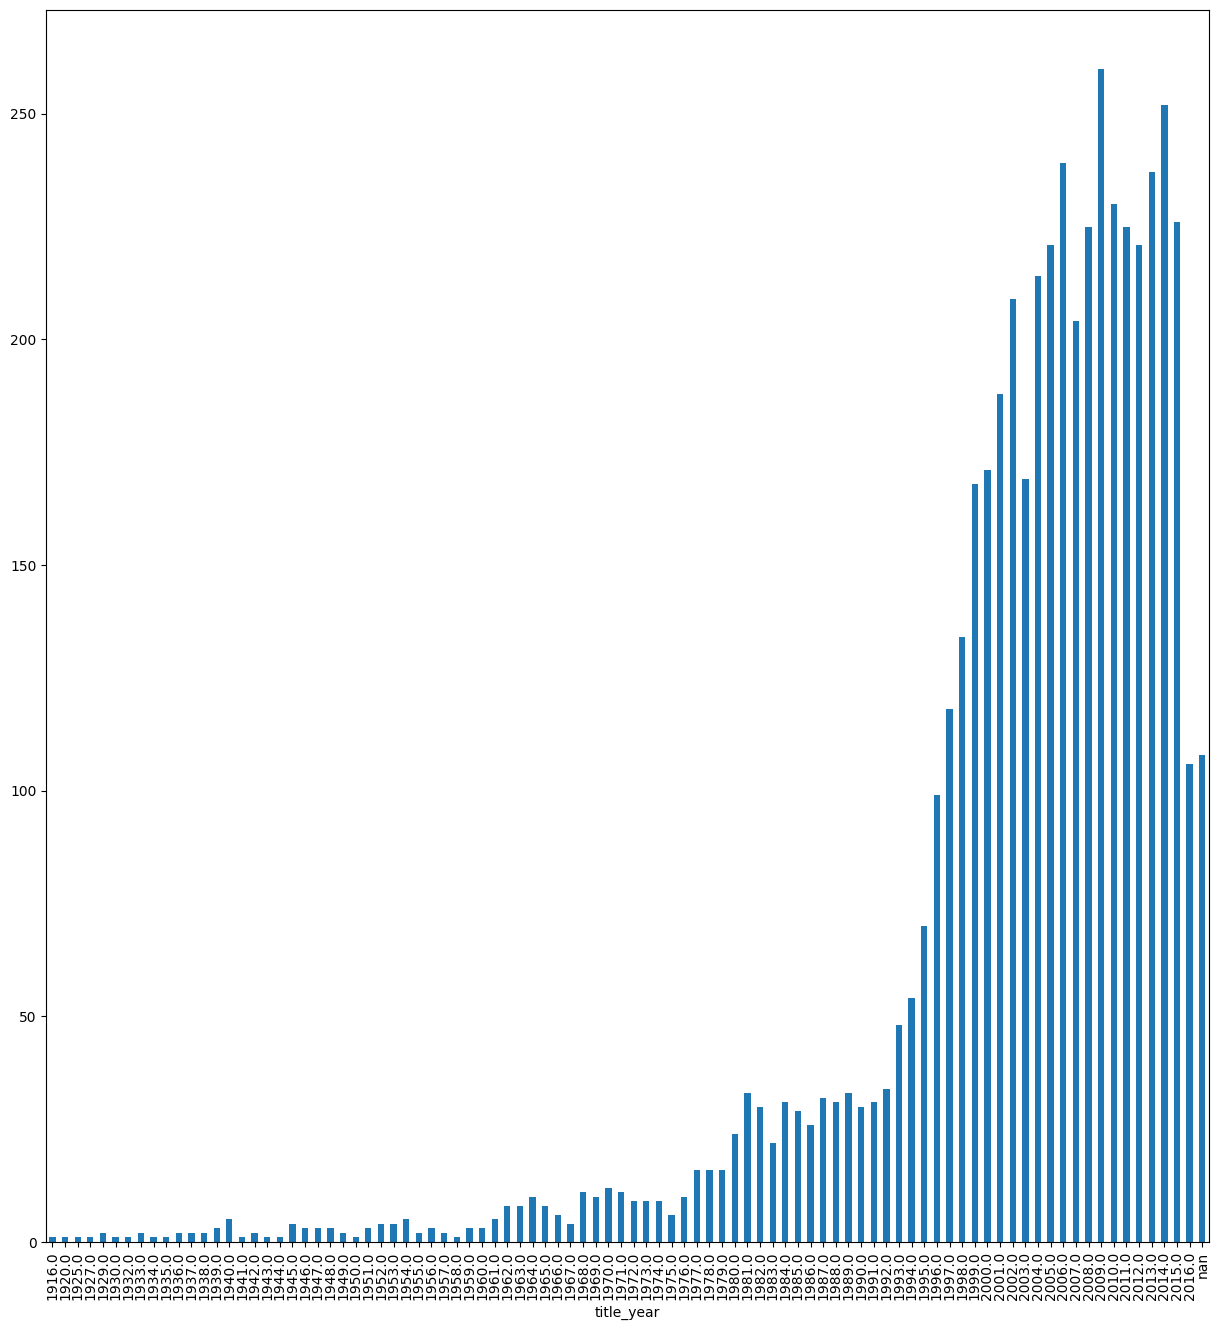

In [67]:
movieyear.title_year.value_counts(dropna = False).sort_index().plot(kind='bar', figsize=(15,16))

In [68]:
#We can see movie_metadata dataset contains movies upto 2016 only'

In [69]:
moviesyear = pd.read_csv("movies_metadata.csv")

C:\Users\dheer\AppData\Local\Temp\ipykernel_24992\2589066352.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  moviesyear = pd.read_csv("datasets/movies_metadata.csv")


In [70]:
#This dataset contains exact release date of the movie, so we have to extract the year from it, to check upto which year movies this dataset contains.

In [71]:
moviesyear['release_date'] = pd.to_datetime(moviesyear['release_date'], errors='coerce')

In [72]:
moviesyear['year'] = moviesyear['release_date'].dt.year

<Axes: xlabel='year'>

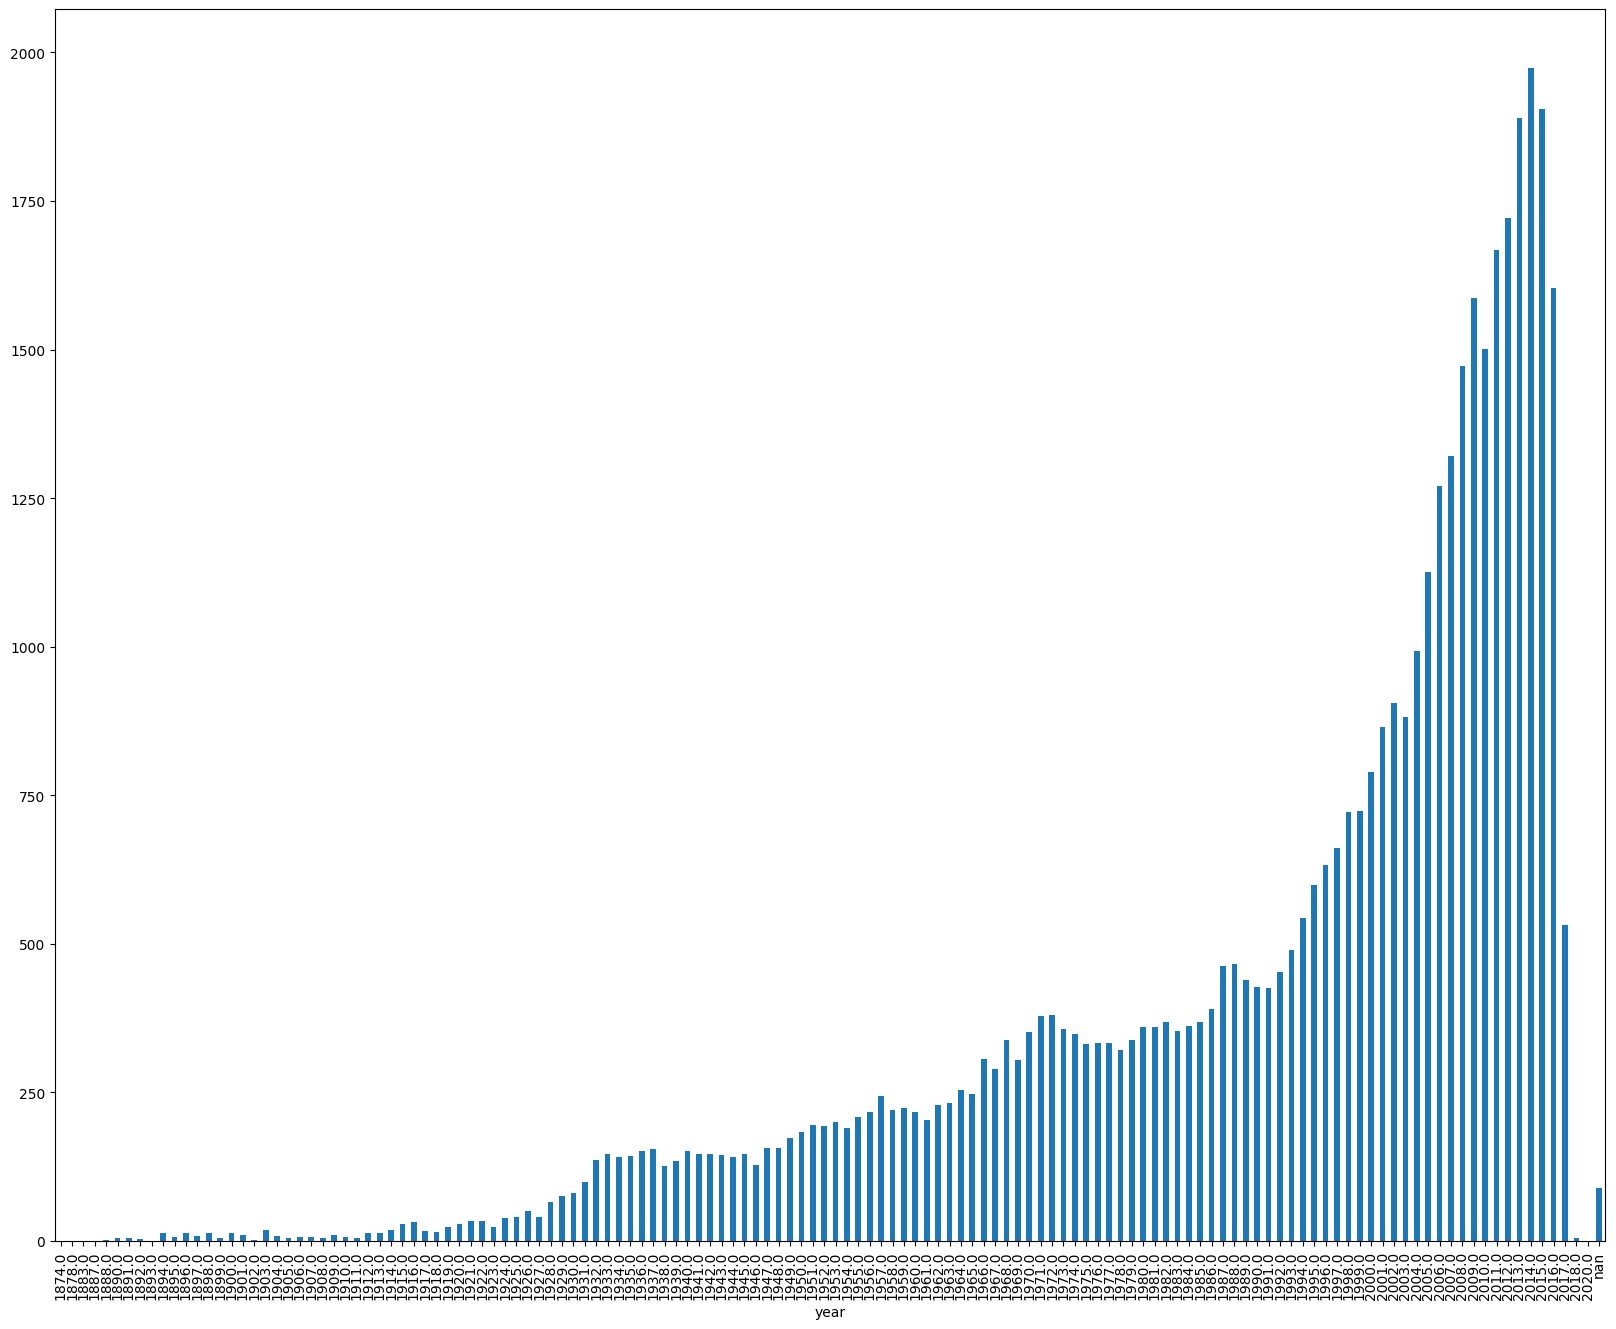

In [74]:
moviesyear.year.value_counts(dropna = False).sort_index().plot(kind='bar', figsize=(20,16))

In [75]:
#This dataset contains data of movies upto 2017